# **Importing Modules**

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from skimage.color import rgb2gray 
from skimage.transform import resize 
from skimage import data,feature
from sklearn.model_selection import train_test_split 
import matplotlib as mpl
import imageio
import imageio.v2 as imageio
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# **Taking dataset**

In [5]:
datasetpath = 'grape'

converting dataset to batchs by tensorflow pipeline

In [6]:
BATCH_SIZE = 30
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    datasetpath,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 3000 files belonging to 3 classes.


# **conveting dataset to LBP**

In [7]:
from skimage import feature


def lbp_features(img):
    lbp = feature.local_binary_pattern(img.astype(np.uint8), 8, 1, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 8 + 3), range=(0, 8 + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

In [8]:
dataseth = []
datalabel = []
featureo =[]
for image_batch, labels_batch in dataset.take(150):
    for i in range(30):
#         img = image_batch[i].numpy().astype("uint8")
        img = image_batch[i].numpy().astype("float")
        grayim = rgb2gray(img) 
        gI1 = resize(grayim,(256,256))
        lbp = lbp_features(gI1)
        image = np.array(lbp).flatten()
        dataseth.append(image)
        featureo.append(lbp)
        datalabel.append(labels_batch[i])

# **Implementing SVM**

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

featureo = np.array(featureo)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(featureo,datalabel, test_size= 0.18)

# One hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
# model = Sequential()
# model.add(Dense(64, input_shape=(4,), activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(3, activation='softmax'))
model = Sequential()
model.add(Dense(6400, input_shape=(10,), activation='relu'))

model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
# model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=2000, validation_data=(x_test, y_test))

Epoch 1/2000
77/77 [==============================] - 1s 5ms/step - loss: 1.0904 - accuracy: 0.3736 - val_loss: 1.0735 - val_accuracy: 0.3852
Epoch 2/2000
77/77 [==============================] - 0s 4ms/step - loss: 1.0250 - accuracy: 0.4785 - val_loss: 0.9896 - val_accuracy: 0.5259
Epoch 3/2000
77/77 [==============================] - 0s 4ms/step - loss: 1.0017 - accuracy: 0.4915 - val_loss: 0.9876 - val_accuracy: 0.5037
Epoch 4/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.9874 - accuracy: 0.5057 - val_loss: 0.9712 - val_accuracy: 0.5093
Epoch 5/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.9742 - accuracy: 0.5244 - val_loss: 0.9892 - val_accuracy: 0.5130
Epoch 6/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.9770 - accuracy: 0.5272 - val_loss: 0.9661 - val_accuracy: 0.5074
Epoch 7/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.9679 - accuracy: 0.5374 - val_loss: 0.9616 - val_accuracy: 0.5278
Epoch 

77/77 [==============================] - 0s 4ms/step - loss: 0.7100 - accuracy: 0.7057 - val_loss: 0.7755 - val_accuracy: 0.6759
Epoch 59/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.7065 - val_loss: 0.7290 - val_accuracy: 0.6981
Epoch 60/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.6682 - accuracy: 0.7236 - val_loss: 0.6877 - val_accuracy: 0.7352
Epoch 61/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.6676 - accuracy: 0.7211 - val_loss: 0.6785 - val_accuracy: 0.7333
Epoch 62/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.6704 - accuracy: 0.7203 - val_loss: 0.6854 - val_accuracy: 0.7370
Epoch 63/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.7118 - val_loss: 0.6984 - val_accuracy: 0.7167
Epoch 64/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.7183 - accuracy: 0.6898 - val_loss: 0.9164 - val_accuracy: 0.6167
Epoch 65/2000

77/77 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.7248 - val_loss: 0.6746 - val_accuracy: 0.7259
Epoch 116/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6465 - accuracy: 0.7280 - val_loss: 0.6596 - val_accuracy: 0.7463
Epoch 117/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6476 - accuracy: 0.7329 - val_loss: 0.9030 - val_accuracy: 0.6481
Epoch 118/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6575 - accuracy: 0.7280 - val_loss: 0.6782 - val_accuracy: 0.7426
Epoch 119/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6344 - accuracy: 0.7337 - val_loss: 0.6617 - val_accuracy: 0.7259
Epoch 120/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6350 - accuracy: 0.7358 - val_loss: 0.6660 - val_accuracy: 0.7389
Epoch 121/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6393 - accuracy: 0.7301 - val_loss: 0.6569 - val_accuracy: 0.7426
Epoch 1

Epoch 172/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6167 - accuracy: 0.7508 - val_loss: 0.6537 - val_accuracy: 0.7370
Epoch 173/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6373 - accuracy: 0.7211 - val_loss: 0.7768 - val_accuracy: 0.6741
Epoch 174/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6365 - accuracy: 0.7317 - val_loss: 0.6518 - val_accuracy: 0.7352
Epoch 175/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6230 - accuracy: 0.7358 - val_loss: 0.6494 - val_accuracy: 0.7333
Epoch 176/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6084 - accuracy: 0.7439 - val_loss: 0.6565 - val_accuracy: 0.7407
Epoch 177/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6367 - accuracy: 0.7354 - val_loss: 0.6764 - val_accuracy: 0.7315
Epoch 178/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6182 - accuracy: 0.7411 - val_loss: 0.6626 - val_accuracy:

Epoch 229/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6147 - accuracy: 0.7382 - val_loss: 0.6694 - val_accuracy: 0.7167
Epoch 230/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6579 - accuracy: 0.7252 - val_loss: 0.6652 - val_accuracy: 0.7222
Epoch 231/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6345 - accuracy: 0.7325 - val_loss: 0.6444 - val_accuracy: 0.7444
Epoch 232/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6286 - accuracy: 0.7382 - val_loss: 0.8055 - val_accuracy: 0.6630
Epoch 233/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.6274 - accuracy: 0.7362 - val_loss: 0.6392 - val_accuracy: 0.7370
Epoch 234/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6092 - accuracy: 0.7484 - val_loss: 0.6737 - val_accuracy: 0.7130
Epoch 235/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6160 - accuracy: 0.7378 - val_loss: 0.6431 - val_accuracy:

Epoch 286/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6098 - accuracy: 0.7402 - val_loss: 0.7039 - val_accuracy: 0.7241
Epoch 287/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5989 - accuracy: 0.7480 - val_loss: 0.6524 - val_accuracy: 0.7426
Epoch 288/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.6296 - accuracy: 0.7394 - val_loss: 0.6535 - val_accuracy: 0.7333
Epoch 289/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.6029 - accuracy: 0.7459 - val_loss: 0.6992 - val_accuracy: 0.7296
Epoch 290/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.6359 - accuracy: 0.7398 - val_loss: 0.6998 - val_accuracy: 0.7167
Epoch 291/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6225 - accuracy: 0.7415 - val_loss: 0.6463 - val_accuracy: 0.7315
Epoch 292/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.6380 - accuracy: 0.7321 - val_loss: 0.7042 - val_accuracy:

Epoch 343/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6272 - accuracy: 0.7378 - val_loss: 0.6459 - val_accuracy: 0.7333
Epoch 344/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.6214 - accuracy: 0.7370 - val_loss: 0.6331 - val_accuracy: 0.7426
Epoch 345/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6467 - accuracy: 0.7301 - val_loss: 0.6309 - val_accuracy: 0.7463
Epoch 346/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6036 - accuracy: 0.7484 - val_loss: 0.6956 - val_accuracy: 0.7185
Epoch 347/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5830 - accuracy: 0.7524 - val_loss: 0.6379 - val_accuracy: 0.7500
Epoch 348/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6066 - accuracy: 0.7427 - val_loss: 0.6637 - val_accuracy: 0.7241
Epoch 349/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.6382 - accuracy: 0.7224 - val_loss: 0.6790 - val_accuracy:

Epoch 400/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.5868 - accuracy: 0.7537 - val_loss: 0.6303 - val_accuracy: 0.7463
Epoch 401/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6277 - accuracy: 0.7370 - val_loss: 0.6729 - val_accuracy: 0.7222
Epoch 402/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6069 - accuracy: 0.7508 - val_loss: 0.6271 - val_accuracy: 0.7426
Epoch 403/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5870 - accuracy: 0.7565 - val_loss: 0.6306 - val_accuracy: 0.7463
Epoch 404/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5931 - accuracy: 0.7581 - val_loss: 0.7478 - val_accuracy: 0.6833
Epoch 405/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6052 - accuracy: 0.7443 - val_loss: 0.6752 - val_accuracy: 0.7296
Epoch 406/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.6217 - accuracy: 0.7407 - val_loss: 0.6811 - val_accuracy:

Epoch 457/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5937 - accuracy: 0.7472 - val_loss: 0.6346 - val_accuracy: 0.7370
Epoch 458/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5980 - accuracy: 0.7585 - val_loss: 0.6748 - val_accuracy: 0.7333
Epoch 459/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5992 - accuracy: 0.7484 - val_loss: 0.6212 - val_accuracy: 0.7426
Epoch 460/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5922 - accuracy: 0.7496 - val_loss: 0.6935 - val_accuracy: 0.7204
Epoch 461/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5889 - accuracy: 0.7545 - val_loss: 0.6991 - val_accuracy: 0.7148
Epoch 462/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.6094 - accuracy: 0.7423 - val_loss: 0.7112 - val_accuracy: 0.6963
Epoch 463/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5964 - accuracy: 0.7516 - val_loss: 0.6392 - val_accuracy:

Epoch 514/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5944 - accuracy: 0.7459 - val_loss: 0.6204 - val_accuracy: 0.7500
Epoch 515/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5816 - accuracy: 0.7569 - val_loss: 0.6902 - val_accuracy: 0.7278
Epoch 516/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5820 - accuracy: 0.7650 - val_loss: 0.6174 - val_accuracy: 0.7463
Epoch 517/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5815 - accuracy: 0.7585 - val_loss: 0.6513 - val_accuracy: 0.7370
Epoch 518/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6007 - accuracy: 0.7488 - val_loss: 0.6215 - val_accuracy: 0.7463
Epoch 519/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6142 - accuracy: 0.7411 - val_loss: 0.6346 - val_accuracy: 0.7370
Epoch 520/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5748 - accuracy: 0.7634 - val_loss: 0.6488 - val_accuracy:

Epoch 571/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6136 - accuracy: 0.7411 - val_loss: 0.6914 - val_accuracy: 0.7167
Epoch 572/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5902 - accuracy: 0.7512 - val_loss: 0.6313 - val_accuracy: 0.7481
Epoch 573/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6056 - accuracy: 0.7476 - val_loss: 0.6327 - val_accuracy: 0.7426
Epoch 574/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5909 - accuracy: 0.7598 - val_loss: 0.6513 - val_accuracy: 0.7519
Epoch 575/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5923 - accuracy: 0.7606 - val_loss: 0.6488 - val_accuracy: 0.7352
Epoch 576/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5823 - accuracy: 0.7573 - val_loss: 0.6118 - val_accuracy: 0.7500
Epoch 577/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5873 - accuracy: 0.7508 - val_loss: 0.6495 - val_accuracy:

Epoch 628/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5848 - accuracy: 0.7561 - val_loss: 0.6142 - val_accuracy: 0.7537
Epoch 629/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5858 - accuracy: 0.7581 - val_loss: 0.6442 - val_accuracy: 0.7222
Epoch 630/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5780 - accuracy: 0.7642 - val_loss: 0.6282 - val_accuracy: 0.7537
Epoch 631/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5732 - accuracy: 0.7610 - val_loss: 0.6410 - val_accuracy: 0.7370
Epoch 632/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5907 - accuracy: 0.7496 - val_loss: 0.6083 - val_accuracy: 0.7500
Epoch 633/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5789 - accuracy: 0.7626 - val_loss: 0.6090 - val_accuracy: 0.7574
Epoch 634/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6000 - accuracy: 0.7545 - val_loss: 0.6258 - val_accuracy:

Epoch 685/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6245 - accuracy: 0.7463 - val_loss: 0.6774 - val_accuracy: 0.7407
Epoch 686/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5993 - accuracy: 0.7472 - val_loss: 0.6498 - val_accuracy: 0.7315
Epoch 687/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5674 - accuracy: 0.7602 - val_loss: 0.6501 - val_accuracy: 0.7463
Epoch 688/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5871 - accuracy: 0.7541 - val_loss: 0.6201 - val_accuracy: 0.7537
Epoch 689/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5949 - accuracy: 0.7549 - val_loss: 0.6444 - val_accuracy: 0.7185
Epoch 690/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.6000 - accuracy: 0.7472 - val_loss: 0.7508 - val_accuracy: 0.6944
Epoch 691/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5907 - accuracy: 0.7528 - val_loss: 0.6331 - val_accuracy:

Epoch 742/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5771 - accuracy: 0.7569 - val_loss: 0.6196 - val_accuracy: 0.7630
Epoch 743/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5803 - accuracy: 0.7565 - val_loss: 0.6051 - val_accuracy: 0.7481
Epoch 744/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5754 - accuracy: 0.7650 - val_loss: 0.6177 - val_accuracy: 0.7556
Epoch 745/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.7606 - val_loss: 0.6205 - val_accuracy: 0.7389
Epoch 746/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5864 - accuracy: 0.7569 - val_loss: 0.6314 - val_accuracy: 0.7333
Epoch 747/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5961 - accuracy: 0.7537 - val_loss: 0.6478 - val_accuracy: 0.7333
Epoch 748/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5621 - accuracy: 0.7671 - val_loss: 0.6173 - val_accuracy:

Epoch 799/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5702 - accuracy: 0.7610 - val_loss: 0.6134 - val_accuracy: 0.7556
Epoch 800/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5622 - accuracy: 0.7687 - val_loss: 0.6073 - val_accuracy: 0.7444
Epoch 801/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5634 - accuracy: 0.7732 - val_loss: 0.6121 - val_accuracy: 0.7463
Epoch 802/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5674 - accuracy: 0.7610 - val_loss: 0.6188 - val_accuracy: 0.7500
Epoch 803/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5562 - accuracy: 0.7667 - val_loss: 0.6302 - val_accuracy: 0.7481
Epoch 804/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5718 - accuracy: 0.7659 - val_loss: 0.7094 - val_accuracy: 0.7111
Epoch 805/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5798 - accuracy: 0.7585 - val_loss: 0.6903 - val_accuracy:

Epoch 856/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5782 - accuracy: 0.7565 - val_loss: 0.6976 - val_accuracy: 0.7222
Epoch 857/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5597 - accuracy: 0.7687 - val_loss: 0.6089 - val_accuracy: 0.7407
Epoch 858/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.5871 - accuracy: 0.7508 - val_loss: 0.6319 - val_accuracy: 0.7463
Epoch 859/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5717 - accuracy: 0.7630 - val_loss: 0.6932 - val_accuracy: 0.7093
Epoch 860/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5779 - accuracy: 0.7589 - val_loss: 0.6092 - val_accuracy: 0.7556
Epoch 861/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5909 - accuracy: 0.7512 - val_loss: 0.6272 - val_accuracy: 0.7370
Epoch 862/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5605 - accuracy: 0.7683 - val_loss: 0.6509 - val_accuracy:

Epoch 913/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5541 - accuracy: 0.7699 - val_loss: 0.6469 - val_accuracy: 0.7444
Epoch 914/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5663 - accuracy: 0.7533 - val_loss: 0.6259 - val_accuracy: 0.7463
Epoch 915/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5680 - accuracy: 0.7659 - val_loss: 0.6261 - val_accuracy: 0.7426
Epoch 916/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5715 - accuracy: 0.7606 - val_loss: 0.6151 - val_accuracy: 0.7463
Epoch 917/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5635 - accuracy: 0.7663 - val_loss: 0.6455 - val_accuracy: 0.7407
Epoch 918/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5775 - accuracy: 0.7598 - val_loss: 0.6137 - val_accuracy: 0.7593
Epoch 919/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5768 - accuracy: 0.7610 - val_loss: 0.6401 - val_accuracy:

Epoch 970/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5523 - accuracy: 0.7667 - val_loss: 0.6741 - val_accuracy: 0.7296
Epoch 971/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.6070 - accuracy: 0.7528 - val_loss: 0.6408 - val_accuracy: 0.7407
Epoch 972/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5698 - accuracy: 0.7650 - val_loss: 0.6063 - val_accuracy: 0.7593
Epoch 973/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5536 - accuracy: 0.7642 - val_loss: 0.6147 - val_accuracy: 0.7537
Epoch 974/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5799 - accuracy: 0.7565 - val_loss: 0.6469 - val_accuracy: 0.7333
Epoch 975/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5564 - accuracy: 0.7707 - val_loss: 0.6372 - val_accuracy: 0.7370
Epoch 976/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5854 - accuracy: 0.7561 - val_loss: 0.6142 - val_accuracy:

Epoch 1027/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5799 - accuracy: 0.7610 - val_loss: 0.6146 - val_accuracy: 0.7426
Epoch 1028/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5680 - accuracy: 0.7667 - val_loss: 0.6163 - val_accuracy: 0.7537
Epoch 1029/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5534 - accuracy: 0.7650 - val_loss: 0.7068 - val_accuracy: 0.7167
Epoch 1030/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5608 - accuracy: 0.7691 - val_loss: 0.6160 - val_accuracy: 0.7444
Epoch 1031/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5653 - accuracy: 0.7593 - val_loss: 0.6699 - val_accuracy: 0.7463
Epoch 1032/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5753 - accuracy: 0.7606 - val_loss: 0.6562 - val_accuracy: 0.7352
Epoch 1033/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5693 - accuracy: 0.7622 - val_loss: 0.6634 - val_ac

77/77 [==============================] - 0s 6ms/step - loss: 0.5739 - accuracy: 0.7593 - val_loss: 0.6181 - val_accuracy: 0.7537
Epoch 1084/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7663 - val_loss: 0.6477 - val_accuracy: 0.7407
Epoch 1085/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5606 - accuracy: 0.7683 - val_loss: 0.6661 - val_accuracy: 0.7333
Epoch 1086/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5720 - accuracy: 0.7569 - val_loss: 0.6535 - val_accuracy: 0.7296
Epoch 1087/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5587 - accuracy: 0.7630 - val_loss: 0.6387 - val_accuracy: 0.7481
Epoch 1088/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5507 - accuracy: 0.7671 - val_loss: 0.6174 - val_accuracy: 0.7574
Epoch 1089/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5587 - accuracy: 0.7683 - val_loss: 0.6123 - val_accuracy: 0.7556
E

77/77 [==============================] - 0s 5ms/step - loss: 0.5556 - accuracy: 0.7667 - val_loss: 0.7748 - val_accuracy: 0.7019
Epoch 1140/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5621 - accuracy: 0.7646 - val_loss: 0.6454 - val_accuracy: 0.7389
Epoch 1141/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5683 - accuracy: 0.7581 - val_loss: 0.6728 - val_accuracy: 0.7352
Epoch 1142/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5533 - accuracy: 0.7736 - val_loss: 0.6161 - val_accuracy: 0.7389
Epoch 1143/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5559 - accuracy: 0.7650 - val_loss: 0.6233 - val_accuracy: 0.7352
Epoch 1144/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5577 - accuracy: 0.7634 - val_loss: 0.6225 - val_accuracy: 0.7463
Epoch 1145/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5476 - accuracy: 0.7646 - val_loss: 0.6233 - val_accuracy: 0.7519
E

77/77 [==============================] - 0s 6ms/step - loss: 0.5820 - accuracy: 0.7602 - val_loss: 0.6077 - val_accuracy: 0.7648
Epoch 1196/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5423 - accuracy: 0.7720 - val_loss: 0.6395 - val_accuracy: 0.7481
Epoch 1197/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5491 - accuracy: 0.7699 - val_loss: 0.6233 - val_accuracy: 0.7500
Epoch 1198/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5511 - accuracy: 0.7732 - val_loss: 0.6153 - val_accuracy: 0.7537
Epoch 1199/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5794 - accuracy: 0.7565 - val_loss: 0.6129 - val_accuracy: 0.7648
Epoch 1200/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5703 - accuracy: 0.7589 - val_loss: 0.6207 - val_accuracy: 0.7519
Epoch 1201/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5499 - accuracy: 0.7711 - val_loss: 0.6693 - val_accuracy: 0.7315
E

77/77 [==============================] - 0s 6ms/step - loss: 0.5572 - accuracy: 0.7675 - val_loss: 0.6124 - val_accuracy: 0.7574
Epoch 1252/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5484 - accuracy: 0.7659 - val_loss: 0.6964 - val_accuracy: 0.7296
Epoch 1253/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5625 - accuracy: 0.7614 - val_loss: 0.6162 - val_accuracy: 0.7519
Epoch 1254/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5517 - accuracy: 0.7638 - val_loss: 0.6246 - val_accuracy: 0.7556
Epoch 1255/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5357 - accuracy: 0.7764 - val_loss: 0.6184 - val_accuracy: 0.7537
Epoch 1256/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5825 - accuracy: 0.7622 - val_loss: 0.6138 - val_accuracy: 0.7556
Epoch 1257/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5679 - accuracy: 0.7585 - val_loss: 0.6431 - val_accuracy: 0.7407
E

77/77 [==============================] - 0s 5ms/step - loss: 0.5430 - accuracy: 0.7768 - val_loss: 0.6068 - val_accuracy: 0.7537
Epoch 1308/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5576 - accuracy: 0.7642 - val_loss: 0.6123 - val_accuracy: 0.7556
Epoch 1309/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5667 - accuracy: 0.7663 - val_loss: 0.6257 - val_accuracy: 0.7574
Epoch 1310/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5572 - accuracy: 0.7630 - val_loss: 0.6498 - val_accuracy: 0.7500
Epoch 1311/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5577 - accuracy: 0.7724 - val_loss: 0.6416 - val_accuracy: 0.7259
Epoch 1312/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5438 - accuracy: 0.7728 - val_loss: 0.6563 - val_accuracy: 0.7537
Epoch 1313/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5477 - accuracy: 0.7748 - val_loss: 0.6133 - val_accuracy: 0.7556
E

77/77 [==============================] - 0s 6ms/step - loss: 0.5458 - accuracy: 0.7724 - val_loss: 0.6175 - val_accuracy: 0.7537
Epoch 1364/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5555 - accuracy: 0.7667 - val_loss: 0.6285 - val_accuracy: 0.7407
Epoch 1365/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5613 - accuracy: 0.7622 - val_loss: 0.6087 - val_accuracy: 0.7556
Epoch 1366/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5434 - accuracy: 0.7744 - val_loss: 0.6320 - val_accuracy: 0.7407
Epoch 1367/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5484 - accuracy: 0.7728 - val_loss: 0.6082 - val_accuracy: 0.7611
Epoch 1368/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5497 - accuracy: 0.7638 - val_loss: 0.6243 - val_accuracy: 0.7500
Epoch 1369/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5361 - accuracy: 0.7711 - val_loss: 0.6107 - val_accuracy: 0.7556
E

77/77 [==============================] - 0s 5ms/step - loss: 0.5550 - accuracy: 0.7659 - val_loss: 0.6214 - val_accuracy: 0.7426
Epoch 1420/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5485 - accuracy: 0.7744 - val_loss: 0.6338 - val_accuracy: 0.7481
Epoch 1421/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5476 - accuracy: 0.7679 - val_loss: 0.6213 - val_accuracy: 0.7556
Epoch 1422/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5541 - accuracy: 0.7695 - val_loss: 0.6226 - val_accuracy: 0.7426
Epoch 1423/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5556 - accuracy: 0.7711 - val_loss: 0.6457 - val_accuracy: 0.7352
Epoch 1424/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5452 - accuracy: 0.7732 - val_loss: 0.6896 - val_accuracy: 0.7370
Epoch 1425/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5584 - accuracy: 0.7715 - val_loss: 0.6269 - val_accuracy: 0.7556
E

77/77 [==============================] - 0s 5ms/step - loss: 0.5343 - accuracy: 0.7789 - val_loss: 0.6844 - val_accuracy: 0.7278
Epoch 1476/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5454 - accuracy: 0.7740 - val_loss: 0.6590 - val_accuracy: 0.7444
Epoch 1477/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5346 - accuracy: 0.7789 - val_loss: 0.6882 - val_accuracy: 0.7241
Epoch 1478/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5503 - accuracy: 0.7671 - val_loss: 0.6214 - val_accuracy: 0.7593
Epoch 1479/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5366 - accuracy: 0.7817 - val_loss: 0.6120 - val_accuracy: 0.7537
Epoch 1480/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5492 - accuracy: 0.7642 - val_loss: 0.6306 - val_accuracy: 0.7519
Epoch 1481/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5487 - accuracy: 0.7756 - val_loss: 0.6670 - val_accuracy: 0.7444
E

77/77 [==============================] - 0s 6ms/step - loss: 0.5393 - accuracy: 0.7768 - val_loss: 0.6575 - val_accuracy: 0.7481
Epoch 1532/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5379 - accuracy: 0.7691 - val_loss: 0.6294 - val_accuracy: 0.7481
Epoch 1533/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5315 - accuracy: 0.7850 - val_loss: 0.6409 - val_accuracy: 0.7556
Epoch 1534/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5451 - accuracy: 0.7703 - val_loss: 0.6057 - val_accuracy: 0.7537
Epoch 1535/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5427 - accuracy: 0.7703 - val_loss: 0.6303 - val_accuracy: 0.7426
Epoch 1536/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5363 - accuracy: 0.7744 - val_loss: 0.6208 - val_accuracy: 0.7463
Epoch 1537/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5449 - accuracy: 0.7724 - val_loss: 0.6160 - val_accuracy: 0.7481
E

77/77 [==============================] - 0s 6ms/step - loss: 0.5471 - accuracy: 0.7711 - val_loss: 0.6933 - val_accuracy: 0.7278
Epoch 1588/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5312 - accuracy: 0.7785 - val_loss: 0.6650 - val_accuracy: 0.7407
Epoch 1589/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5548 - accuracy: 0.7650 - val_loss: 0.6353 - val_accuracy: 0.7574
Epoch 1590/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5545 - accuracy: 0.7654 - val_loss: 0.6653 - val_accuracy: 0.7352
Epoch 1591/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5499 - accuracy: 0.7687 - val_loss: 0.6108 - val_accuracy: 0.7500
Epoch 1592/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5393 - accuracy: 0.7736 - val_loss: 0.6221 - val_accuracy: 0.7407
Epoch 1593/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5546 - accuracy: 0.7756 - val_loss: 0.6563 - val_accuracy: 0.7333
E

77/77 [==============================] - 0s 6ms/step - loss: 0.5433 - accuracy: 0.7760 - val_loss: 0.6279 - val_accuracy: 0.7630
Epoch 1644/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5593 - accuracy: 0.7736 - val_loss: 0.6147 - val_accuracy: 0.7519
Epoch 1645/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5438 - accuracy: 0.7671 - val_loss: 0.6337 - val_accuracy: 0.7463
Epoch 1646/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5567 - accuracy: 0.7634 - val_loss: 0.6502 - val_accuracy: 0.7407
Epoch 1647/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5881 - accuracy: 0.7585 - val_loss: 0.6351 - val_accuracy: 0.7426
Epoch 1648/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5412 - accuracy: 0.7785 - val_loss: 0.6105 - val_accuracy: 0.7519
Epoch 1649/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5474 - accuracy: 0.7728 - val_loss: 0.6167 - val_accuracy: 0.7537
E

77/77 [==============================] - 0s 6ms/step - loss: 0.5201 - accuracy: 0.7890 - val_loss: 0.6141 - val_accuracy: 0.7556
Epoch 1700/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5264 - accuracy: 0.7846 - val_loss: 0.6562 - val_accuracy: 0.7370
Epoch 1701/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5415 - accuracy: 0.7699 - val_loss: 0.6342 - val_accuracy: 0.7481
Epoch 1702/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5474 - accuracy: 0.7768 - val_loss: 0.6393 - val_accuracy: 0.7500
Epoch 1703/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5455 - accuracy: 0.7744 - val_loss: 0.6418 - val_accuracy: 0.7426
Epoch 1704/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5464 - accuracy: 0.7744 - val_loss: 0.6307 - val_accuracy: 0.7611
Epoch 1705/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5495 - accuracy: 0.7703 - val_loss: 0.6230 - val_accuracy: 0.7519
E

77/77 [==============================] - 0s 6ms/step - loss: 0.5544 - accuracy: 0.7715 - val_loss: 0.6591 - val_accuracy: 0.7315
Epoch 1756/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5608 - accuracy: 0.7675 - val_loss: 0.6149 - val_accuracy: 0.7537
Epoch 1757/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5224 - accuracy: 0.7768 - val_loss: 0.6370 - val_accuracy: 0.7389
Epoch 1758/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5369 - accuracy: 0.7789 - val_loss: 0.6190 - val_accuracy: 0.7500
Epoch 1759/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5377 - accuracy: 0.7776 - val_loss: 0.6786 - val_accuracy: 0.7407
Epoch 1760/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5327 - accuracy: 0.7752 - val_loss: 0.6162 - val_accuracy: 0.7611
Epoch 1761/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5589 - accuracy: 0.7699 - val_loss: 0.6430 - val_accuracy: 0.7463
E

77/77 [==============================] - 0s 5ms/step - loss: 0.5467 - accuracy: 0.7752 - val_loss: 0.6136 - val_accuracy: 0.7611
Epoch 1812/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5365 - accuracy: 0.7780 - val_loss: 0.6228 - val_accuracy: 0.7500
Epoch 1813/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5349 - accuracy: 0.7736 - val_loss: 0.6326 - val_accuracy: 0.7481
Epoch 1814/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5332 - accuracy: 0.7679 - val_loss: 0.7001 - val_accuracy: 0.7093
Epoch 1815/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5259 - accuracy: 0.7789 - val_loss: 0.6216 - val_accuracy: 0.7519
Epoch 1816/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5378 - accuracy: 0.7760 - val_loss: 0.6132 - val_accuracy: 0.7500
Epoch 1817/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5510 - accuracy: 0.7679 - val_loss: 0.6816 - val_accuracy: 0.7389
E

77/77 [==============================] - 0s 6ms/step - loss: 0.5327 - accuracy: 0.7748 - val_loss: 0.6455 - val_accuracy: 0.7389
Epoch 1868/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5254 - accuracy: 0.7833 - val_loss: 0.6433 - val_accuracy: 0.7500
Epoch 1869/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5325 - accuracy: 0.7829 - val_loss: 0.6439 - val_accuracy: 0.7407
Epoch 1870/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5398 - accuracy: 0.7707 - val_loss: 0.6253 - val_accuracy: 0.7500
Epoch 1871/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5270 - accuracy: 0.7764 - val_loss: 0.6220 - val_accuracy: 0.7481
Epoch 1872/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5252 - accuracy: 0.7825 - val_loss: 0.6147 - val_accuracy: 0.7556
Epoch 1873/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5339 - accuracy: 0.7760 - val_loss: 0.6193 - val_accuracy: 0.7556
E

77/77 [==============================] - 0s 5ms/step - loss: 0.5228 - accuracy: 0.7817 - val_loss: 0.6119 - val_accuracy: 0.7593
Epoch 1924/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5393 - accuracy: 0.7699 - val_loss: 0.6278 - val_accuracy: 0.7593
Epoch 1925/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5191 - accuracy: 0.7829 - val_loss: 0.6395 - val_accuracy: 0.7426
Epoch 1926/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5358 - accuracy: 0.7760 - val_loss: 0.6235 - val_accuracy: 0.7593
Epoch 1927/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5237 - accuracy: 0.7846 - val_loss: 0.6501 - val_accuracy: 0.7389
Epoch 1928/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5269 - accuracy: 0.7760 - val_loss: 0.6168 - val_accuracy: 0.7463
Epoch 1929/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5381 - accuracy: 0.7760 - val_loss: 0.6562 - val_accuracy: 0.7407
E

77/77 [==============================] - 0s 6ms/step - loss: 0.5242 - accuracy: 0.7793 - val_loss: 0.6082 - val_accuracy: 0.7556
Epoch 1980/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5248 - accuracy: 0.7793 - val_loss: 0.6616 - val_accuracy: 0.7481
Epoch 1981/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5347 - accuracy: 0.7772 - val_loss: 0.6513 - val_accuracy: 0.7444
Epoch 1982/2000
77/77 [==============================] - 0s 4ms/step - loss: 0.5407 - accuracy: 0.7768 - val_loss: 0.6984 - val_accuracy: 0.7204
Epoch 1983/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5610 - accuracy: 0.7614 - val_loss: 0.6205 - val_accuracy: 0.7537
Epoch 1984/2000
77/77 [==============================] - 0s 6ms/step - loss: 0.5257 - accuracy: 0.7756 - val_loss: 0.6034 - val_accuracy: 0.7611
Epoch 1985/2000
77/77 [==============================] - 0s 5ms/step - loss: 0.5224 - accuracy: 0.7780 - val_loss: 0.6057 - val_accuracy: 0.7574
E

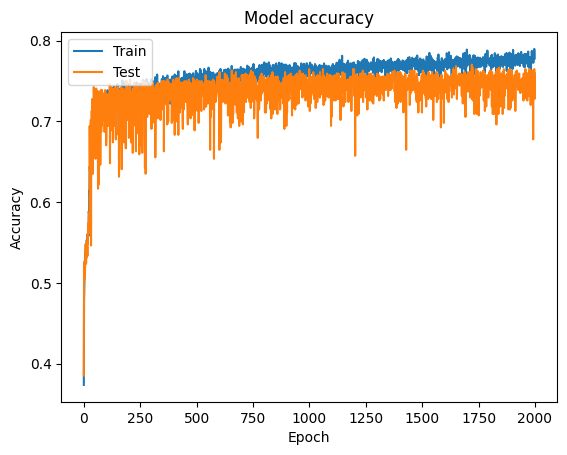

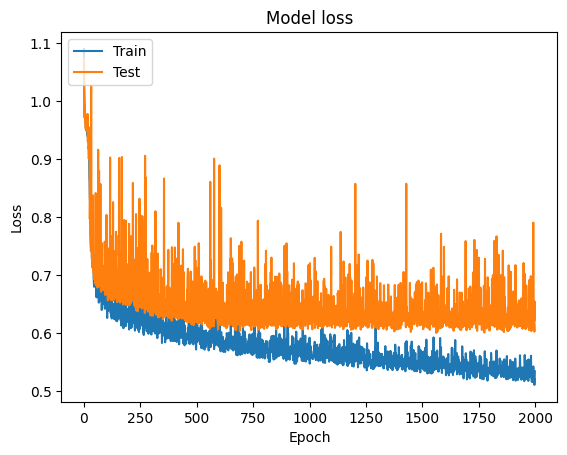

In [15]:
# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

0.76

In [16]:
# Get the predictions
y_pred = model.predict(x_test)

# Convert the predictions to class labels
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculate the accuracy
acc = np.mean(y_pred == y_test)
print("Accuracy:", acc)

# Create the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", conf_matrix)


17/17 [==============================] - 0s 1ms/step
Accuracy: 0.7592592592592593
Confusion Matrix: [[109  20  51]
 [  9 153  23]
 [ 18   9 148]]


[[109  20  51]
 [  9 153  23]
 [ 18   9 148]]


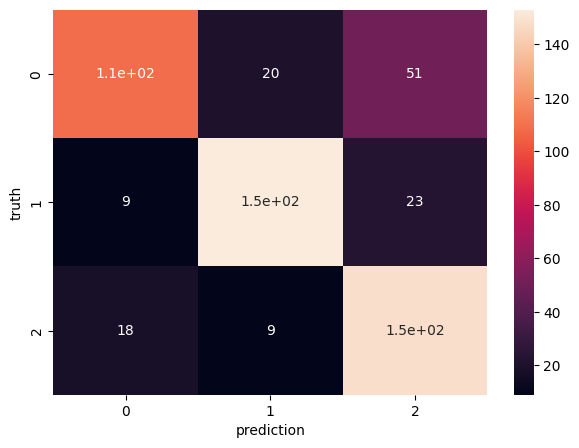

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(conf_matrix,annot=True)
plt.xlabel("prediction")
plt.ylabel('truth')
print(conf_matrix)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.61      0.69       180
           1       0.84      0.83      0.83       185
           2       0.67      0.85      0.75       175

    accuracy                           0.76       540
   macro avg       0.77      0.76      0.76       540
weighted avg       0.77      0.76      0.76       540

